In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload do arquivo CSV
print("Faça upload do arquivo resultados_simulacao.csv")
uploaded = files.upload()

# Carrega o CSV
csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename)
display(df)


Faça upload do arquivo resultados_simulacao.csv


Saving resultados_simulacao.csv to resultados_simulacao (4).csv


,Metodo_Utilizado,Quantidade_Agentes,Tempo_Computacional_Medio_ms,Total_Colisoes,Tempo_Total_Conclusao_s,Distancia_Extra_Percorrida
0,Direta,5,0.0037,0,5.4667,48.21
1,Direta,10,0.0081,0,5.6333,101.26
2,Direta,15,0.0071,7,60.0000,84.15
3,Direta,20,0.0126,4,60.0000,122.81
4,Direta,30,0.0227,31,60.0000,126.20
5,Indireta,5,0.0115,0,7.3000,106.34
6,Indireta,10,0.0184,1,9.1333,145.29
7,Indireta,15,0.0273,4,7.5000,114.75
8,Indireta,20,0.0381,7,7.9667,111.86
9,Indireta,30,0.0503,15,8.1833,125.69


In [32]:
CORES = {
    "Direta": "#e74c3c",
    "Indireta": "#3498db",
    "Sem_Comunicacao": "#2ecc71"
}
MARCADORES = {
    "Direta": "o",
    "Indireta": "s",
    "Sem_Comunicacao": "^"
}
LABELS = {
    "Direta": "Comunicação Direta",
    "Indireta": "Comunicação Indireta",
    "Sem_Comunicacao": "Sem Comunicação"
}

plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 12,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--'
})

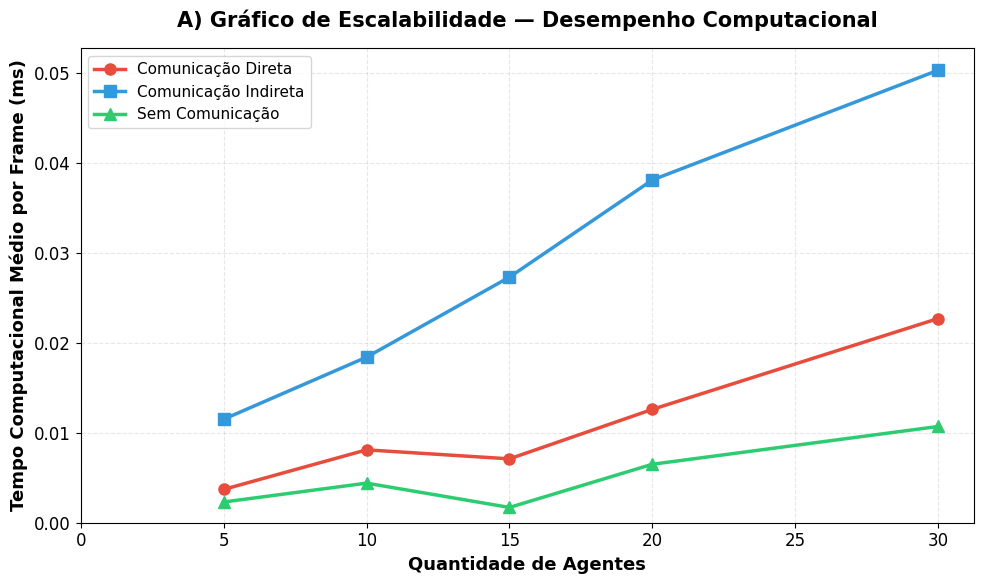

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

for metodo in df['Metodo_Utilizado'].unique():
    subset = df[df['Metodo_Utilizado'] == metodo].sort_values('Quantidade_Agentes')
    ax.plot(
        subset['Quantidade_Agentes'],
        subset['Tempo_Computacional_Medio_ms'],
        marker=MARCADORES.get(metodo, 'o'),
        color=CORES.get(metodo, '#333'),
        linewidth=2.5,
        markersize=8,
        label=LABELS.get(metodo, metodo)
    )

ax.set_xlabel('Quantidade de Agentes', fontsize=13, fontweight='bold')
ax.set_ylabel('Tempo Computacional Médio por Frame (ms)', fontsize=13, fontweight='bold')
ax.set_title('A) Gráfico de Escalabilidade — Desempenho Computacional',
             fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=11, loc='upper left')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('grafico_escalabilidade.png', dpi=150, bbox_inches='tight')
plt.show()

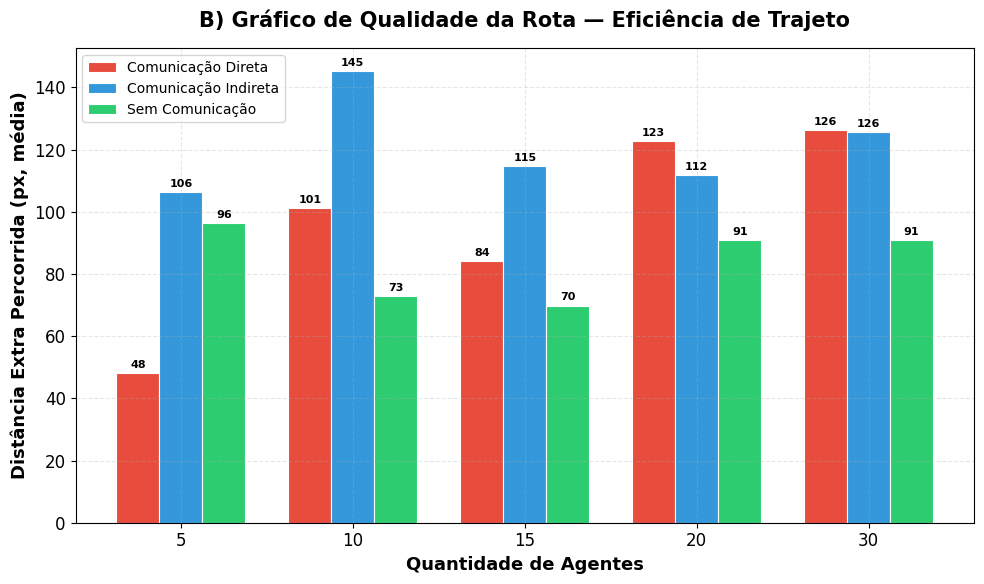

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

metodos = list(df['Metodo_Utilizado'].unique())
agent_counts = sorted(df['Quantidade_Agentes'].unique())
n_methods = len(metodos)
bar_width = 0.25
x = np.arange(len(agent_counts))

for i, metodo in enumerate(metodos):
    subset = df[df['Metodo_Utilizado'] == metodo].sort_values('Quantidade_Agentes')
    valores = []
    for ac in agent_counts:
        row = subset[subset['Quantidade_Agentes'] == ac]
        valores.append(row['Distancia_Extra_Percorrida'].values[0] if len(row) > 0 else 0)

    offset = (i - n_methods / 2 + 0.5) * bar_width
    bars = ax.bar(
        x + offset, valores, bar_width,
        color=CORES.get(metodo, '#333'),
        label=LABELS.get(metodo, metodo),
        edgecolor='white', linewidth=0.8
    )
    for bar, val in zip(bars, valores):
        if val > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{val:.0f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.set_xlabel('Quantidade de Agentes', fontsize=13, fontweight='bold')
ax.set_ylabel('Distância Extra Percorrida (px, média)', fontsize=13, fontweight='bold')
ax.set_title('B) Gráfico de Qualidade da Rota — Eficiência de Trajeto',
             fontsize=15, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(agent_counts)
ax.legend(fontsize=10)
ax.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('grafico_qualidade_rota.png', dpi=150, bbox_inches='tight')
plt.show()


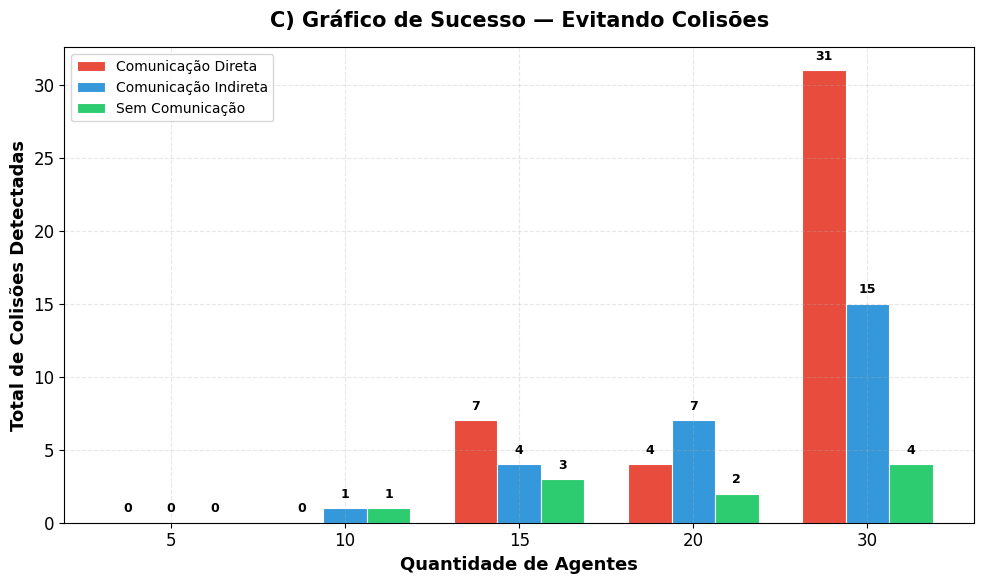

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, metodo in enumerate(metodos):
    subset = df[df['Metodo_Utilizado'] == metodo].sort_values('Quantidade_Agentes')
    valores = []
    for ac in agent_counts:
        row = subset[subset['Quantidade_Agentes'] == ac]
        valores.append(int(row['Total_Colisoes'].values[0]) if len(row) > 0 else 0)

    offset = (i - n_methods / 2 + 0.5) * bar_width
    bars = ax.bar(
        x + offset, valores, bar_width,
        color=CORES.get(metodo, '#333'),
        label=LABELS.get(metodo, metodo),
        edgecolor='white', linewidth=0.8
    )
    for bar, val in zip(bars, valores):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{val}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Quantidade de Agentes', fontsize=13, fontweight='bold')
ax.set_ylabel('Total de Colisões Detectadas', fontsize=13, fontweight='bold')
ax.set_title('C) Gráfico de Sucesso — Evitando Colisões',
             fontsize=15, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(agent_counts)
ax.legend(fontsize=10)
ax.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('grafico_colisoes.png', dpi=150, bbox_inches='tight')
plt.show()

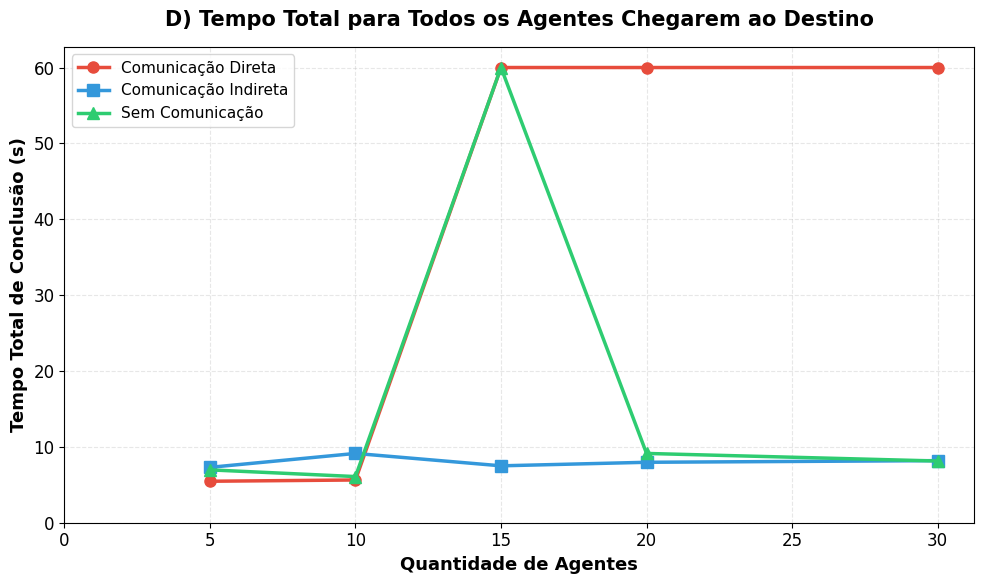

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

for metodo in df['Metodo_Utilizado'].unique():
    subset = df[df['Metodo_Utilizado'] == metodo].sort_values('Quantidade_Agentes')
    ax.plot(
        subset['Quantidade_Agentes'],
        subset['Tempo_Total_Conclusao_s'],
        marker=MARCADORES.get(metodo, 'o'),
        color=CORES.get(metodo, '#333'),
        linewidth=2.5,
        markersize=8,
        label=LABELS.get(metodo, metodo)
    )

ax.set_xlabel('Quantidade de Agentes', fontsize=13, fontweight='bold')
ax.set_ylabel('Tempo Total de Conclusão (s)', fontsize=13, fontweight='bold')
ax.set_title('D) Tempo Total para Todos os Agentes Chegarem ao Destino',
             fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=11, loc='upper left')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('grafico_tempo_conclusao.png', dpi=150, bbox_inches='tight')
plt.show()